## Project 4: Predictive Analysis of Poisonous Mushrooms
## By: Natan Bienstock

### Introduction
The goal of this analysis is to come up with a predictive model to determine whether a given mushroom is poisonous or edible. <br>
To accomplish this goal, data is used from the [UCI Mushroom Data Set](https://archive.ics.uci.edu/ml/datasets/mushroom). <br>
The modeling used for this analysis is binary logistic regression, as we are looking to determine whether a mushroom is either poisonous or not, which can be translated to a binary choice. <br>
The steps taken to achieve this task are:
1. Loading the Data and Performing an EDA (Exploratory Data Analysis) on the data set.
2. Preparing the Data for the Binary Logistic Regression
3. Building and Comparing Different Binary Logistic Regression Models
4. Summary and Recommendations for Future Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib notebook

### 1. Loading the Data and EDA
The data from the UCI Mushroom Data Set is loaded into a pandas' dataframe. <br>
For this analysis, a subset of the data is used consisting of 4 columns:
1. Poisonous column
2. Cap-Color
3. Odor
4. Habitat 

These columns were chosen because I believed that they would have the most potential effect on whether a mushroom was poisonous or not. <br>
It is conceivable that a mushroom would be poisonous if it had a particular odor, particular color, or was found in a particular location. <br>
So, of the 23 columns in the mushrooms data set, I chose to focus my analysis on these 4 columns.<br>
After loading the data into a dataframe, I then wanted to see how the data was distributed. <br>
To do so, I found the number of mushrooms for each value in each column, and used seaborn to make bar plots of each column to make it easier to visualize the distribution of data. <br>

In [2]:
# load the desired columns of mushroom data into a 
# pandas' dataframe and name the columns
mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                        header = None, 
                        usecols = [0,3,5,22], 
                        names = ['Poisonous', 'Cap-Color', 'Odor', 'Habitat'])

In [3]:
# return the first 5 rows of mushroom data
mushrooms.head()

,Poisonous,Cap-Color,Odor,Habitat
0,p,n,p,u
1,e,y,a,g
2,e,w,l,m
3,p,w,p,u
4,e,g,n,g


#### The Poisonous Column
Based on the [data dictionary](https://archive.ics.uci.edu/ml/datasets/mushroom), there are 2 possible values for this column:
1. e - the mushroom is edible
2. p - the mushroom is poisonous

The data in this data set contain more edible mushrooms than poisonous mushrooms, with 4208 edible and 3916 poisonous mushrooms. 

In [4]:
# return the number of mushrooms for 
# each value in Poisonous column
mushrooms.Poisonous.value_counts()

e    4208
p    3916
Name: Poisonous, dtype: int64

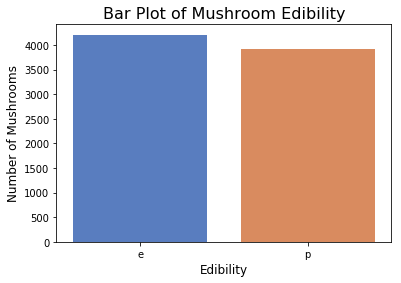

In [5]:
# create a seaborn countplot (bar plot) of the values
# in the Poisonous column, and order it by the number 
# of mushrooms for each value
sns.countplot(x = 'Poisonous', data = mushrooms, order = mushrooms.Poisonous.value_counts().index, 
              palette = 'muted')
# add a title and labels to the seaborn plot
plt.title('Bar Plot of Mushroom Edibility', fontsize = 16)
plt.xlabel('Edibility', fontsize = 12)
plt.ylabel('Number of Mushrooms', fontsize = 12);

#### Cap-Color Column
Based on the [data dictionary](https://archive.ics.uci.edu/ml/datasets/mushroom), there are 10 possible values for this column:
1. n - the mushroom's cap is brown
2. b - the mushroom's cap is buff
3. c - the mushroom's cap is cinnamon
4. g - the mushroom's cap is gray
5. r - the mushroom's cap is green
6. p - the mushroom's cap is pink
7. u - the mushroom's cap is purple
8. e - the mushroom's cap is red
9. w - the mushroom's cap is white
10. y - the mushroom's cap is yellow

The most common cap color in this data set is brown with 2284 brown mushrooms. <br>
There are 5 cap-colors that have more than 1000 mushrooms in the data set with that color: brown, gray, red, yellow, and white. 

In [6]:
# return the number of mushrooms for 
# each value in Cap-Color column
mushrooms['Cap-Color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: Cap-Color, dtype: int64

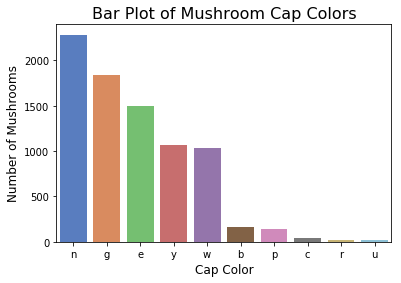

In [7]:
# create a seaborn countplot (bar plot) of the values
# in the Cap-Color column, and order it by the number 
# of mushrooms for each value
sns.countplot(x = 'Cap-Color', data = mushrooms, order = mushrooms['Cap-Color'].value_counts().index, 
              palette = 'muted')
# add a title and labels to the seaborn plot
plt.title('Bar Plot of Mushroom Cap Colors', fontsize = 16)
plt.xlabel('Cap Color', fontsize = 12)
plt.ylabel('Number of Mushrooms', fontsize = 12);

#### Odor Column
Based on the [data dictionary](https://archive.ics.uci.edu/ml/datasets/mushroom), there are 9 possible values for this column:
1. a - the mushroom has an almond odor
2. l - the mushroom has an anise odor
3. c - the mushroom has a creosote odor
4. y - the mushroom has a fishy odor
5. f - the mushroom has a foul odor
6. m - the mushroom has a musty odor
7. n - the mushroom has no odor
8. p - the mushroom has a pungent odor
9. s - the mushroom has a spicy odor

The most common odor in the dataset is no odor, with 3528 mushrooms having no odor. <br>
There is only one other odor with more than 1000 mushrooms having it, and that is the foul odor with 2160 mushrooms in the data set smelling foul. <br>

In [8]:
# return the number of mushrooms for 
# each value in Odor column
mushrooms.Odor.value_counts()

n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: Odor, dtype: int64

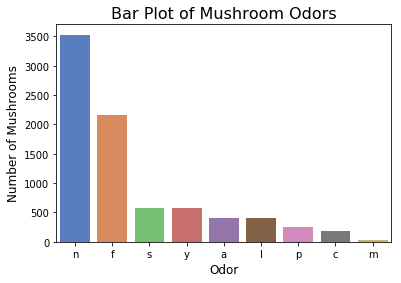

In [9]:
# create a seaborn countplot (bar plot) of the values
# in the Odor column, and order it by the number 
# of mushrooms for each value
sns.countplot(x = 'Odor', data = mushrooms, order = mushrooms.Odor.value_counts().index, 
              palette = 'muted')
# add a title and labels to the seaborn plot
plt.title('Bar Plot of Mushroom Odors', fontsize = 16)
plt.xlabel('Odor', fontsize = 12)
plt.ylabel('Number of Mushrooms', fontsize = 12);

#### Habitat Column
Based on the [data dictionary](https://archive.ics.uci.edu/ml/datasets/mushroom), there are 7 possible values for this column:
1. g - the mushroom was found in grasses
2. l - the mushroom was found in leaves
3. m - the mushroom was found in meadows
4. p - the mushroom was found on paths
5. u - the mushroom was found in urban areas
6. w - the mushroom was found in waste
7. d - the mushroom was found in woods

The most common habitat in the data set is the woods with 3148 mushrooms found there. <br>
There are two other habitats with more than 1000 mushrooms found there, grasses and paths. 

In [10]:
# return the number of mushrooms for 
# each value in Habitat column
mushrooms.Habitat.value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: Habitat, dtype: int64

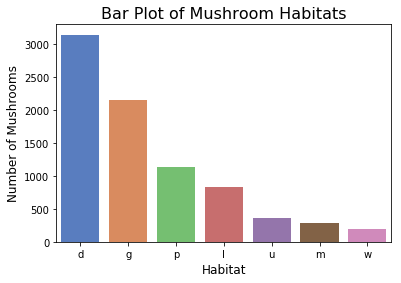

In [11]:
# create a seaborn countplot (bar plot) of the values
# in the Habitat column, and order it by the number 
# of mushrooms for each value
sns.countplot(x = 'Habitat', data = mushrooms, order = mushrooms.Habitat.value_counts().index, 
              palette = 'muted')
# add a title and labels to the seaborn plot
plt.title('Bar Plot of Mushroom Habitats', fontsize = 16)
plt.xlabel('Habitat', fontsize = 12)
plt.ylabel('Number of Mushrooms', fontsize = 12);

#### Missing Data Check
In order to check whether there were any values missing in any column, I first found the number of rows of data in the data set using the shape attribute of the mushrooms dataframe. <br>
I found that there were 8124 rows of mushroom data. <br>
I then found the sum of the value counts for each column and confirmed that they were also 8124. <br>
Since they were all 8124, I concluded that this data set was not missing any data in these columns. 

In [12]:
# return the number of rows in the mushroom data set.
mushrooms.shape[0]

8124

In [13]:
# return the number of mushrooms that have 
# values in the Poisonous column
mushrooms.Poisonous.value_counts().sum()

8124

In [14]:
# return the number of mushrooms that have 
# values in the Cap-Color column
mushrooms['Cap-Color'].value_counts().sum()

8124

In [15]:
# return the number of mushrooms that have 
# values in the Odor column
mushrooms.Odor.value_counts().sum()

8124

In [16]:
# return the number of mushrooms that have 
# values in the Habitat column
mushrooms.Habitat.value_counts().sum()

8124

### 2. Preparing the Data 
In order to get the data ready for predictive modeling, the categorical data needs to be converted to numeric values. <br>
To do so, I created a copy of the mushrooms dataframe, and then created indicator variables for each important value in my data set. <br>
I determined that a value was "important" if there were more than 1000 mushrooms that had that value. <br>
I believed that any value that had less than 1000 mushrooms was a sparse classification, and should be combined to help the model be more accurate. <br>
I created one indicator variable that I wanted to predict - Poisonous_Dummy - that contains a 1 if the mushroom is poisonous, and a 0 if the mushroom is edible. <br>
For the Cap-Color column I created 6 indicator variables:
1. Brown-Cap - 1 if the mushroom's cap color is brown, 0 otherwise
2. Gray-Cap - 1 if the mushroom's cap color is gray, 0 otherwise
3. Red-Cap - 1 if the mushroom's cap color is red, 0 otherwise
4. Yellow-Cap - 1 if the mushroom's cap color is yellow, 0 otherwise
5. White-Cap - 1 if the mushroom's cap color is white, 0 otherwise
6. Other-Cap - 1 if the mushroom's cap color is any other color not previously specified, 0 otherwise

For the Odor column I created 3 indicator variables:
1. No-Odor - 1 if the mushroom's odor is none, 0 otherwise
2. Foul-Odor - 1 if the mushroom's odor is foul, 0 otherwise
3. Other-Odor - 1 if the mushroom's odor is any other odor not previously specified, 0 otherwise


For the Habitat column I created 4 indicator variables:
1. Woods-Habitat - 1 if the mushroom's habitat is woods, 0 otherwise
2. Grass-Habitat - 1 if the mushroom's habitat is grasses, 0 otherwise
3. Paths-Habitat - 1 if the mushroom's habitat is paths, 0 otherwise
4. Other-Habiat - 1 if the mushroom's habitat is any other habitat not previously specified, 0 otherwise

After creating these indicator variables, I split the data into 2 variables: y and X. <bR>
The y variable contained the Poisonous_Dummy variable, the variable that I want to predict in my model.<br>
The X variable contains all the other indicator variables, which will be used to try and predict the y variable. <br>
<br>
I then used the scikit-learn's test_train_split method to split my data into a training set and a test set. <br>
I put 70% of my data in the training set, and 30% in the test set. <br>
The reason for splitting the data is so that I can have an additional metric to test how well the predictive models predict whether a mushroom is poisonous, by testing it on data that the model has yet to see. <br>

In [17]:
# create a copy of the mushrooms dataframe
mushrooms2 = mushrooms.copy()

In [18]:
# return the first 5 rows of the copied dataframe
mushrooms2.head()

,Poisonous,Cap-Color,Odor,Habitat
0,p,n,p,u
1,e,y,a,g
2,e,w,l,m
3,p,w,p,u
4,e,g,n,g


In [19]:
# create an indicator variable as to whether a mushroom was poisonous
# 1 if poisonous, 0 if edible
mushrooms2['Poisonous_Dummy'] = (mushrooms2['Poisonous'] == 'p').astype(int)

In [20]:
# return the first 5 rows of data to confirm indicator variable
# was created correctly
mushrooms2.head()

,Poisonous,Cap-Color,Odor,Habitat,Poisonous_Dummy
0,p,n,p,u,1
1,e,y,a,g,0
2,e,w,l,m,0
3,p,w,p,u,1
4,e,g,n,g,0


In [21]:
# create indicator variables for the 5 colors in the Cap-Color
# column that had more than 1000 mushrooms.
# create sixth column that indicates any other color.
mushrooms2['Brown-Cap'] = (mushrooms2['Cap-Color'] == 'n').astype(int)
mushrooms2['Gray-Cap'] = (mushrooms2['Cap-Color'] == 'g').astype(int)
mushrooms2['Red-Cap'] = (mushrooms2['Cap-Color'] == 'e').astype(int)
mushrooms2['Yellow-Cap'] = (mushrooms2['Cap-Color'] == 'y').astype(int)
mushrooms2['White-Cap'] = (mushrooms2['Cap-Color'] == 'w').astype(int)
mushrooms2['Other-Cap'] = (mushrooms2['Cap-Color'].isin(['b','p','c','u','r'])).astype(int)

In [22]:
# create indicator variables for the 2 odors in the Odor
# column that had more than 1000 mushrooms.
# create third column that indicates any other odor.
mushrooms2['No-Odor'] = (mushrooms2['Odor'] == 'n').astype(int)
mushrooms2['Foul-Odor'] = (mushrooms2['Odor'] == 'f').astype(int)
mushrooms2['Other-Odor'] = (mushrooms2['Odor'].isin(['y','s','l','a','p','c','m'])).astype(int)

In [23]:
# create indicator variables for the 3 habitats in the Habitat
# column that had more than 1000 mushrooms.
# create fourth column that indicates any other habitat.
mushrooms2['Woods-Habitat'] = (mushrooms2['Habitat'] == 'd').astype(int)
mushrooms2['Grass-Habitat'] = (mushrooms2['Habitat'] == 'g').astype(int)
mushrooms2['Paths-Habitat'] = (mushrooms2['Habitat'] == 'p').astype(int)
mushrooms2['Other-Habitat'] = (mushrooms2['Habitat'].isin(['l','u','m','w'])).astype(int)

In [24]:
# return the first 5 rows of data to confirm all indicator
# variables were created correctly.
mushrooms2.head()

,Poisonous,Cap-Color,Odor,Habitat,Poisonous_Dummy,Brown-Cap,Gray-Cap,Red-Cap,Yellow-Cap,White-Cap,Other-Cap,No-Odor,Foul-Odor,Other-Odor,Woods-Habitat,Grass-Habitat,Paths-Habitat,Other-Habitat
0,p,n,p,u,1,1,0,0,0,0,0,0,0,1,0,0,0,1
1,e,y,a,g,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,e,w,l,m,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,p,w,p,u,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,e,g,n,g,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [25]:
# create variable y to hold the variable that I want to predict
y = mushrooms2['Poisonous_Dummy']
# return the first 5 rows of y variable
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Poisonous_Dummy, dtype: int64

In [26]:
# create variable X to hold the variables that I want to
# use to predict y variable

X = mushrooms2[['Brown-Cap', 'Gray-Cap', 'Red-Cap', 'Yellow-Cap', 'White-Cap', 'Other-Cap',
               'No-Odor', 'Foul-Odor','Other-Odor', 
                'Woods-Habitat', 'Grass-Habitat', 'Paths-Habitat', 'Other-Habitat']]

In [27]:
# return the first 5 rows of X variable
X.head()

,Brown-Cap,Gray-Cap,Red-Cap,Yellow-Cap,White-Cap,Other-Cap,No-Odor,Foul-Odor,Other-Odor,Woods-Habitat,Grass-Habitat,Paths-Habitat,Other-Habitat
0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,1,0,0


In [28]:
# create 4 variables, X_train, X_test, y_train, y_test
# to hold the X and y values to be used for training
# the models and for testing the models
# use 30% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Building & Comparing Predictive Models
#### Thoughts Prior to Modeling Data
The 1981 book _The Audubon Society Field Guide to North American Mushrooms_ claims that there is no easy rule to determine whether a mushroom is poisonous. <bR>
This makes me think that there is no one visible sign as to whether a mushroom is poisonous. <br>
So I believe that neither the Cap-Color nor the Habitat variables will be the best indicators of a mushroom's edibility on their own. <br>
I believe that odor will be the best single predictor of a mushroom's edibility, but a model that combines all three columns will be the best indicators of a mushroom's edibility. <br>
    
Before building any models, I wanted to establish the benchmark that any model would have to beat to better than just guessing. <br>
To do so, I found that ~48.3644% of mushrooms in the training dataset were poisonous, meaning that ~51.6356% of mushrooms were edible. <br>
So if you guessed that every mushroom was edible, you would be right ~51.6356% of the time. <br>
Any model that is built needs to be better than guessing, so it needs to be right more than ~51.6356% of the time to be useful. <br>

Since I want to predict whether a mushroom was poisonous or edible, I used the LogisticRegression() method in scikit-learn to build my models.

In [29]:
# return percentage of mushrooms in training data that are poisonous.
y_train.sum()/y_train.shape[0] * 100

48.36440379880408

#### Predicting Based on Cap-Color
The first model that I built predict's whether a mushroom is poisonous or not using the cap-color indicator variables. <br>
I used scikt-learn's LogisticRegression method to create the model, and then fit my cap-color indicator variables to the model. <br>
I then used the score method to determine what percentage of mushrooms in training data were accurately determined to be poisonous using this model. <br>
This model had an accuracy of ~58.6352% which is ~7% better than just guessing. <br>
On the test data, the model was able to predict a mushroom's edibility ~59.4750% of the time, which is slightly better than on the training data, and about 8% better than just guessing. 

In [30]:
# use scikit-learn's LogisticRegression modeling method
model_cap_color = LogisticRegression()
# fit the model using the subset of the X_train data
# that contains indicator variables about Cap-Color and the y_train data
model_cap_color.fit(X_train[['Brown-Cap', 'Gray-Cap', 'Red-Cap', 'Yellow-Cap', 'White-Cap', 'Other-Cap']],y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
# return how accurate the model is on training data
model_cap_color.score(X_train[['Brown-Cap', 'Gray-Cap', 'Red-Cap', 'Yellow-Cap', 'White-Cap', 'Other-Cap']],y_train) * 100

58.63524446007739

In [32]:
# use the model to generate predictions on the test data
# of whether a mushroom will be poisonous
predicted = model_cap_color.predict(X_test[['Brown-Cap', 'Gray-Cap', 'Red-Cap', 'Yellow-Cap', 'White-Cap', 'Other-Cap']])
# return how accurate the model is on test data
# by checking how often the prediction and the actual
# poisonous variables are the same
metrics.accuracy_score(y_test, predicted) * 100

59.47497949138638

#### Predicting Based on Odor
The second model that I built predict's whether a mushroom is poisonous or not using the odor indicator variables. <br>
I used scikt-learn's LogisticRegression method to create the model, and then fit my odor indicator variables to the model. <br>
I then used the score method to determine what percentage of mushrooms in training data were accurately determined to be poisonous using this model. <br>
This model had an accuracy of ~88.9729% which is ~37% better guessing. <br>
On the test data, the model was able to predict a mushroom's edibility ~87.9820% of the time, which is slightly worse than on the training data, and about 36% better than just guessing. 

In [33]:
# use scikit-learn's LogisticRegression modeling method
model_odor = LogisticRegression()
# fit the model using the subset of the X_train data
# that contains indicator variables about Odor and the y_train data
model_odor.fit(X_train[['No-Odor', 'Foul-Odor','Other-Odor']],y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
# return how accurate the model is on training data
model_odor.score(X_train[['No-Odor', 'Foul-Odor','Other-Odor']],y_train) * 100

88.97291593387267

In [35]:
# use the model to generate predictions on the test data
# of whether a mushroom will be poisonous
predicted = model_odor.predict(X_test[['No-Odor', 'Foul-Odor','Other-Odor']])
# return how accurate the model is on test data
# by checking how often the prediction and the actual
# poisonous variables are the same
metrics.accuracy_score(y_test, predicted) * 100

87.98195242001641

#### Predicting Based on Habitat
The third model that I built predict's whether a mushroom is poisonous or not using the habitat indicator variables. <br>
I used scikt-learn's LogisticRegression method to create the model, and then fit my habitat indicator variables to the model. <br>
I then used the score method to determine what percentage of mushrooms in training data were accurately determined to be poisonous using this model. <br>
This model had an accuracy of ~63.7883% which is ~12% better than just guessing. <br>
On the test data, the model was able to predict a mushroom's edibility ~64.3560% of the time, which is slightly better than on the training data, and about 13% better than just guessing. 

In [36]:
# use scikit-learn's LogisticRegression modeling method
model_habitat = LogisticRegression()
# fit the model using the subset of the X_train data
# that contains indicator variables about Habitat and the y_train data
model_habitat.fit(X_train[['Woods-Habitat', 'Grass-Habitat', 'Paths-Habitat', 'Other-Habitat']],y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
# return how accurate the model is on training data
model_habitat.score(X_train[['Woods-Habitat', 'Grass-Habitat', 'Paths-Habitat', 'Other-Habitat']],y_train) * 100

63.788251846640875

In [38]:
# use the model to generate predictions on the test data
# of whether a mushroom will be poisonous
predicted = model_habitat.predict(X_test[['Woods-Habitat', 'Grass-Habitat', 'Paths-Habitat', 'Other-Habitat']])
# return how accurate the model is on test data
# by checking how often the prediction and the actual
# poisonous variables are the same
metrics.accuracy_score(y_test, predicted) * 100

64.35602953240361

#### Predicting Based on All Indicator Variables
The final model that I built predict's whether a mushroom is poisonous or not using all the indicator variables that I created. <br>
I used scikt-learn's LogisticRegression method to create the model, and then fit all of my indicator variables to the model. <br>
I then used the score method to determine what percentage of mushrooms in training data were accurately determined to be poisonous using this model. <br>
This model had an accuracy of ~94.4601% which is ~43% better than just guessing. <br>
On the test data, the model was able to predict a mushroom's edibility ~94.2166% of the time, which is slightly worse than on the training data, but still about 43% better than just guessing.<br>

In [39]:
# use scikit-learn's LogisticRegression modeling method
model = LogisticRegression()
# fit the model using all of the indicator variables in 
# the X_train data and the y_train data
model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
# return how accurate the model is on training data * 100
model.score(X_train,y_train) * 100

94.46007738304608

In [41]:
# use the model to generate predictions on the test data
# of whether a mushroom will be poisonous
predicted = model.predict(X_test)
# return how accurate the model is on test data
# by checking how often the prediction and the actual
# poisonous variables are the same
metrics.accuracy_score(y_test, predicted) * 100

94.21657095980311

In [42]:
# print the name of each of the indicator variables
print(X_train.columns)
# return the coefficients of each indicator variable in the model
model.coef_

Index(['Brown-Cap', 'Gray-Cap', 'Red-Cap', 'Yellow-Cap', 'White-Cap',
       'Other-Cap', 'No-Odor', 'Foul-Odor', 'Other-Odor', 'Woods-Habitat',
       'Grass-Habitat', 'Paths-Habitat', 'Other-Habitat'],
      dtype='object')


array([[ 0.81167182,  0.01391547,  1.41892351, -3.19041249, -1.08569961,
         2.9038334 , -5.56843898,  6.5119642 , -0.07129312,  0.60417601,
        -0.30467564,  0.11877102,  0.4539607 ]])

### 4. Summary and Recommendation for Future Analysis
If I could only choose one column to use as a predictor for a mushroom's edibility, I would use odor as my predictor. <br>
The logistic regression model using odor had an accuracy of between 87-88% making it, by far, the most accurate model that I had which used only one predictor column. <br>
However, if I could use more than one column for my predictions, I would use the final model I created which used all three predictor columns used in my analysis. <br>
This model had the highest accuracy, as it was able to accurately predict a mushroom's edibility ~94% of the time. <br>
In that third model, the following variables made it more likely for a mushroom to be poisonous:
1. Having a brown cap color
2. Having a gray cap color
3. Having a red cap color
4. Having any other cap color
5. Having a foul odor
6. Being found in the woods
7. Being found on the paths
8. Being found in any other habitat

The following variables made it less likely for a mushroom to be poisonous:
1. Having a yellow cap color
2. Having a white cap color
3. Having no odor
4. Having any other odor
5. Being found in the grass

From this model, we can conclude that yellow or white capped mushrooms, with no odor found in the grass should be  safe to eat. <br>

Future analyses should attempt to see whether we can achieve a high accuracy with only two of the columns, as opposed to all three. <br>
Additionally, it should test the significance (p-value) of each indicator variable included in each model. <br>
Finally, another column from the mushroom data set that might be good to include in the analysis would be population, as it would be interesting to determine whether how a mushroom grows (with regards to other mushrooms) can be used to determine its edibilty (ie. are lone mushrooms more likely to be poisonous). 